In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as poly

In [2]:
data=pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print('gender = ', data['gender'].unique())
print('-------------------------------------------------------')

print('race/ethnicity = ', data['race/ethnicity'].unique())
print('-------------------------------------------------------')

print('parental level of education = ', data['parental level of education'].unique())
print('-------------------------------------------------------')

print('test preparation course  = ', data['test preparation course'].unique())
print('-------------------------------------------------------')


print('lunch = ', data['lunch'].unique())
print('-------------------------------------------------------')



gender =  ['female' 'male']
-------------------------------------------------------
race/ethnicity =  ['group B' 'group C' 'group A' 'group D' 'group E']
-------------------------------------------------------
parental level of education =  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-------------------------------------------------------
test preparation course  =  ['none' 'completed']
-------------------------------------------------------
lunch =  ['standard' 'free/reduced']
-------------------------------------------------------


- As the math,reading and writing scores are of numerical value so we dont have to check it as it will have spread of marks.

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Minimum math score is 0,minimum reading score is 17 and that of writimg is 10.The maximum scores for all the three are 100. 


In [6]:
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [7]:
data.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

- No null values in any of the categorical or numerical data.

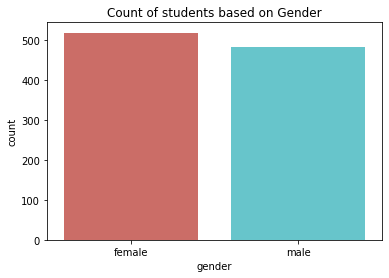

In [8]:
sns.countplot(data['gender'],palette="hls")
plt.title('Count of students based on Gender')
plt.show()

- More number of Females than males

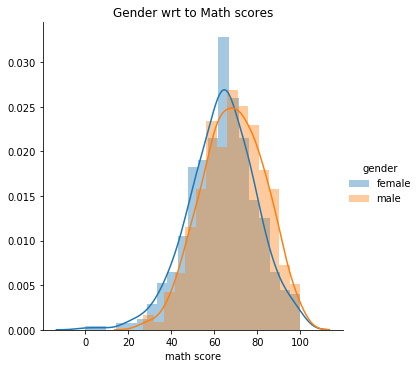

In [9]:
sns.FacetGrid(data,hue='gender',height=5).map(sns.distplot,'math score').add_legend()
plt.title('Gender wrt to Math scores')
plt.show()

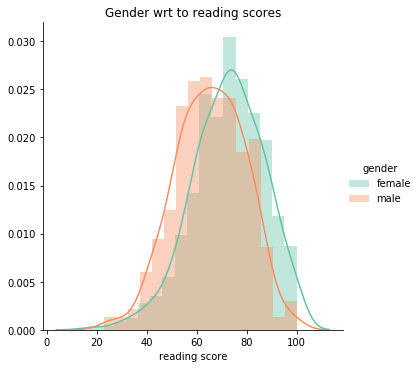

In [10]:
sns.FacetGrid(data,hue='gender',height=5,palette='Set2').map(sns.distplot,'reading score').add_legend()
plt.title('Gender wrt to reading scores')
plt.show()

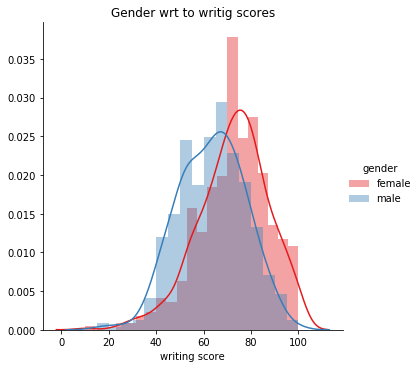

In [11]:
sns.FacetGrid(data,hue='gender',height=5,palette='Set1').map(sns.distplot,'writing score').add_legend()
plt.title('Gender wrt to writig scores')
plt.show()

- We can observe that except for math scores Writing and Reading scores are dominated by Females.
- The math scores ares are almost similar as the data is overlapping while a few males being dominant and securing around 75 to 100 marks.
- There are more girls in marks range of 60 to 70 than males for math scores.
- For reading scores a major portion of boys have scored from 35 to 85 while girls were able to score from 50 to 100.
- The writing scores for males started from 40 and spreaded all the way up to 84 while those pf females started from 45 and ended with 100.In writing Females dominated the scores

- Now I'll be combaining the scores together to make total score column as it'd take time to analse them individually.
- One can explore the individual data as above with box plots,violin plots,density plots etc for univariate analysis.

In [12]:
data['total_marks']= data['math score']+data['reading score']+data['writing score']


#### Now we will be analyzing the data with total marks wrt to remaining para meters

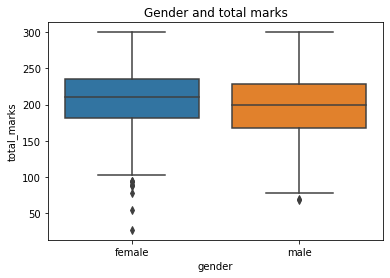

In [13]:
sns.boxplot('gender','total_marks',data=data)
plt.title('Gender and total marks')
plt.show()

- Majority of the females were able to score between 180 and 235 while the majority of males scored from 170 to 230.
- How ever we can also see that there are no outliers and more number of females scored less than 100 when compared to males.

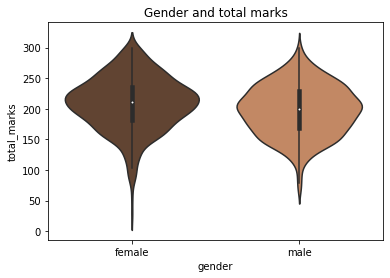

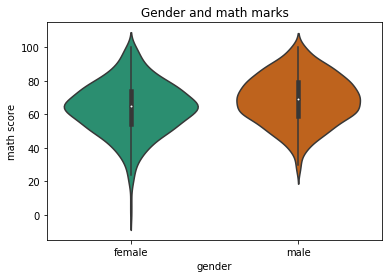

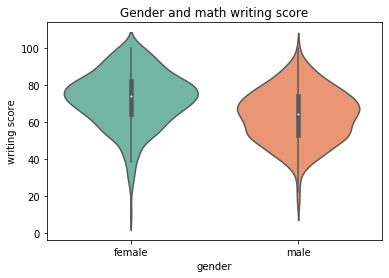

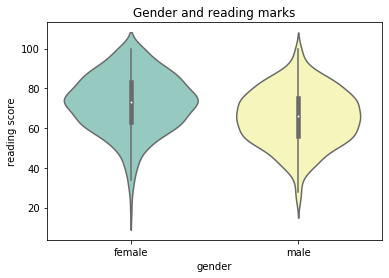

In [14]:

sns.violinplot('gender','total_marks',data=data,palette='copper')
plt.title('Gender and total marks')
plt.show()

sns.violinplot('gender','math score',data=data,palette='Dark2')
plt.title('Gender and math marks')
plt.show()

sns.violinplot('gender','writing score',data=data,palette='Set2')
plt.title('Gender and math writing score')
plt.show()

sns.violinplot('gender','reading score',data=data,palette='Set3')
plt.title('Gender and reading marks')
plt.show()

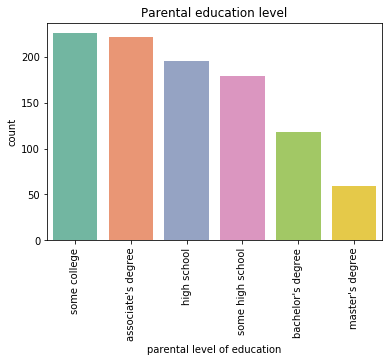

In [15]:
sns.countplot(data['parental level of education'],order=data['parental level of education'].value_counts().index,palette='Set2',orient='h')
plt.xticks(rotation='vertical')
plt.title('Parental education level')
plt.show()

In [16]:
test_completed=data.loc[data['test preparation course']=='completed']
test_not_comp=data.loc[data['test preparation course']=='none']

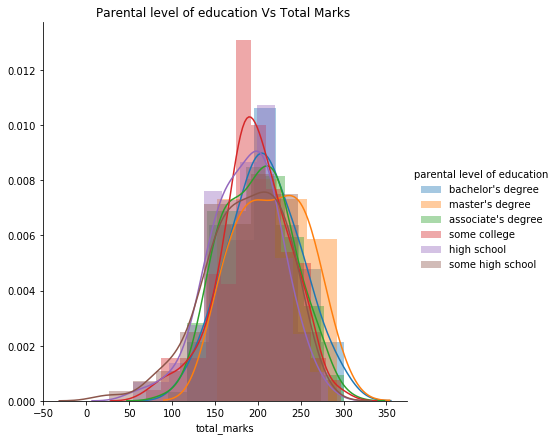

In [17]:
sns.FacetGrid(test_not_comp,hue='parental level of education',height=6).map(sns.distplot,'total_marks').add_legend()
plt.title('Parental level of education Vs Total Marks ')
plt.show()

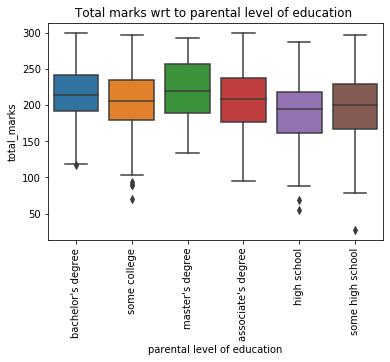

In [18]:
sns.boxplot('parental level of education','total_marks',data=data)
plt.title('Total marks wrt to parental level of education ')
plt.xticks(rotation='vertical')
plt.show()

- Most of the data is getting overlapped.So we cannot conclude from this.However the median and 50th percentile of all the types fall in range from 200 to 230

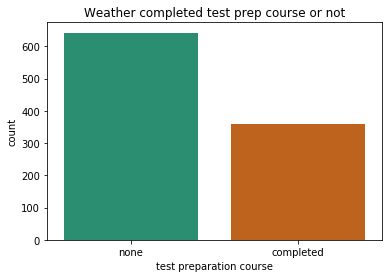

In [19]:
sns.countplot(data['test preparation course'],order=data['test preparation course'].value_counts().index,palette='Dark2')
plt.title('Weather completed test prep course or not')
plt.show()

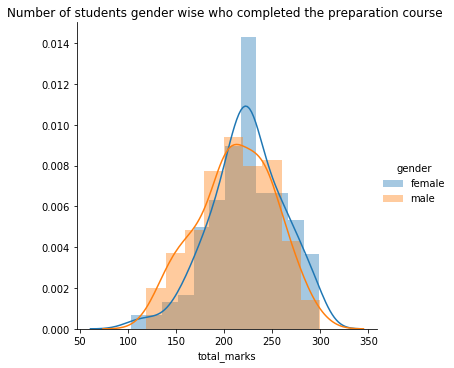

In [20]:
sns.FacetGrid(test_completed,hue='gender',height=5).map(sns.distplot,'total_marks').add_legend()
plt.title('Number of students gender wise who completed the preparation course ')
plt.show()

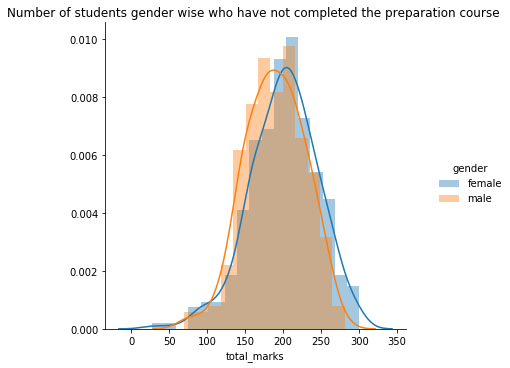

In [21]:
sns.FacetGrid(test_not_comp,hue='gender',height=5).map(sns.distplot,'total_marks').add_legend()
plt.title('Number of students gender wise who have not completed the preparation course ')
plt.show()

In [22]:
tresh_above=data.loc[data['total_marks']>=130]
tresh_below=data.loc[data['total_marks']<130]

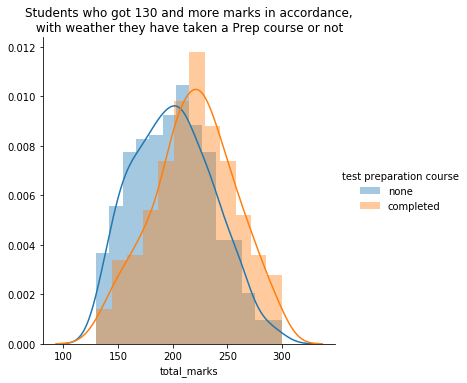

In [23]:
sns.FacetGrid(tresh_above,hue='test preparation course',height=5).map(sns.distplot,'total_marks').add_legend()
plt.title('Students who got 130 and more marks in accordance,\n with weather they have taken a Prep course or not ')
plt.show()

- I have filtered the data of students whose marks are minimum of 130 as it would be appropriate and they fall into pass class.

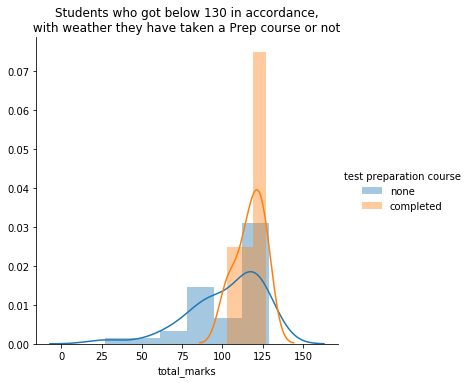

In [24]:
sns.FacetGrid(tresh_below,hue='test preparation course',height=5).map(sns.distplot,'total_marks').add_legend()
plt.title('Students who got below 130 in accordance,\n with weather they have taken a Prep course or not ')
plt.show()

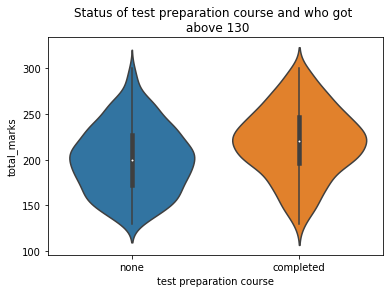

In [25]:
sns.violinplot('test preparation course','total_marks',data=tresh_above)
plt.title('Status of test preparation course and who got \n above 130')
plt.show()

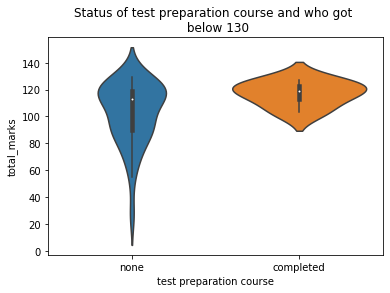

In [26]:
sns.violinplot('test preparation course','total_marks',data=tresh_below)
plt.title('Status of test preparation course and who got \n below 130')
plt.show()

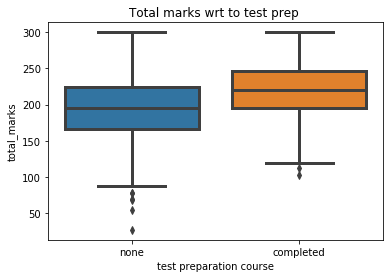

In [27]:
sns.boxplot('test preparation course','total_marks',data=data,linewidth=3)
plt.title('Total marks wrt to test prep ')
plt.show()

- Initially it looked like all the data is overlapped but when we set a treshold it became cleare that the students who completed the test prep course have fairly more advantage that those who do not complete it.Infact from above plots itis very clear that students who completed the course scored a minimum of 100+ marks than tose compared to who did not complete the course.

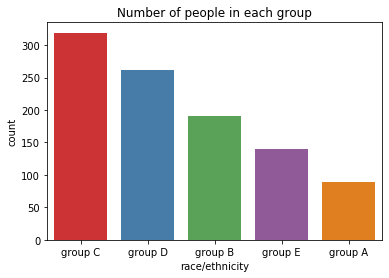

In [28]:
sns.countplot(data['race/ethnicity'],order=data['race/ethnicity'].value_counts().index,palette='Set1')
plt.title('Number of people in each group')
plt.show()

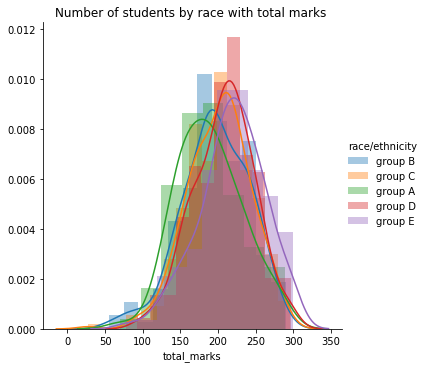

In [29]:
sns.FacetGrid(data,hue='race/ethnicity',height=5).map(sns.distplot,'total_marks').add_legend()
plt.title('Number of students by race with total marks ')
plt.show()

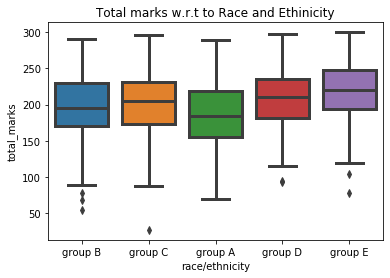

In [30]:
sns.boxplot('race/ethnicity','total_marks',data=data,linewidth=3)
plt.title('Total marks w.r.t to Race and Ethinicity')
plt.show()

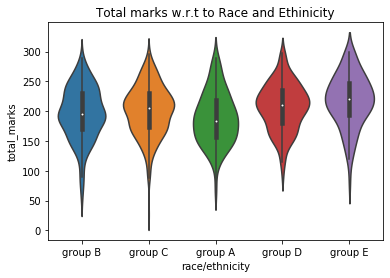

In [31]:
sns.violinplot('race/ethnicity','total_marks',data=data)
plt.title('Total marks w.r.t to Race and Ethinicity')
plt.show()

- Massive over lap of the data has occured.However it is evident that Students who are from group A have scored little lower than the rest.
- The medians of all the groups lies bit close to each othe except for group A.

In [32]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_marks'],
      dtype='object')

### Conclusion:
- From all the aove we can conclude that race/ethinicity,parental education level have no significant impact on the Total marks.
- Students who completed test prep course have sigificant advantage in scoring than the students who do not complete it.
- Please not that the above conclusions are independent of number of students present in each group.